---
## Single-particle tracking (SPT).

**Demo data**  
Download the demodata from this link: [the test video from Munder et al 2016 paper](https://elifesciences.org/download/aHR0cHM6Ly9zdGF0aWMtbW92aWUtdXNhLmdsZW5jb2Vzb2Z0d2FyZS5jb20vbXA0LzEwLjc1NTQvNTI2LzY3YWIyOTExMjkxMTcyMGU1OTk4MjY5OGZiMWVlMzY2OTE0YTBmZDIvZWxpZmUtMDkzNDctbWVkaWExLm1wNA==/elife-09347-media1.mp4?_hash=0Xnr7HGX1AYuIfQcupU%2BW3PG30wh8Wj6Cx3CXW6cO%2BA%3D) and store it in folder containing this notebook i.e. `examples`.

**Additional requirements for the demo**  
pip install imageio[ffmpeg] ## for obtaining image frames from .mp4 video 

**Important note**  
The analysis shown in this demo is only for the purpose of demonstration of `htsimaging`'s usage. It is not optimized and does not use to the exact experimental parameters of the Munder et al study.  

In [1]:
## load requirements
import warnings
warnings.filterwarnings('ignore')
import logging
from os.path import dirname
import pandas as pd

In [2]:
## parameters of the notebook
input_path="data/spt/Munder_et_al_2016/elife-09347-media1.mp4"
output_path="data/spt/Munder_et_al_2016/emsd.tsv"
test=True

In [3]:
## infered parameters
output_dir_path=dirname(output_path)
logging.info(output_dir_path)

## Frames of images

In [4]:
from htsimaging.spt.io import to_frames
frames=to_frames(input_path,channeli=1)

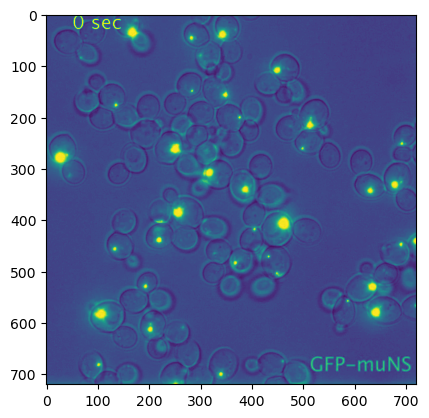

In [5]:
import matplotlib.pyplot as plt
ax=plt.imshow(frames[0])
_=ax.set(title="Example image")

In [6]:
## trim the text on the frames
frames=[frame[25:-55,:] for frame in frames]

## Particle-detection and tracking

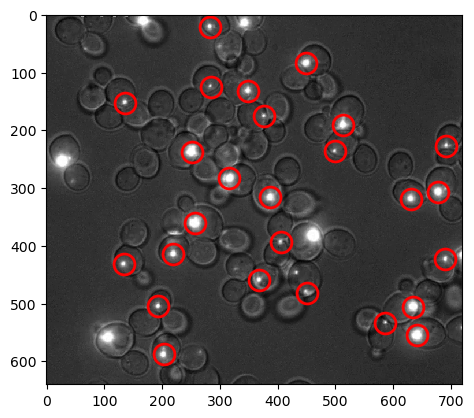

In [7]:
from htsimaging.spt.stat import to_msd
imsd,emsd=to_msd(frames,cores=4,diameter=41,test=test)

In [8]:
## save outputs
emsd=pd.DataFrame(emsd)
imsd.to_csv(output_dir_path+"imsd.tsv")
emsd.to_csv(output_path)

## Outputs: IMSD and EMSD

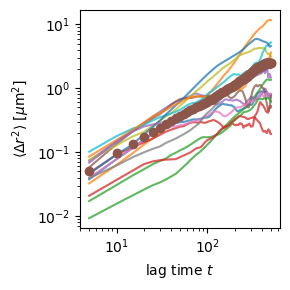

In [10]:
fig = plt.figure(figsize=(3, 3))
ax=plt.subplot(111)
from htsimaging.spt.viz import plot_msd
_=plot_msd(imsd,emsd,scale="log")